In [25]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [26]:
os.chdir("C:\\Users\\Poori\\Desktop\\Udemy\\A-Z Machine learning Kaggle\\Model Selection\\CrossValidation_Linear Regression")

In [27]:
housing = pd.read_csv('Housing.csv')

In [28]:
# list of all the "yes-no" binary categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# applying the function to the housing variables list
housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [29]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [30]:
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [31]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()
df=housing

In [32]:
# recaling the variables (both)
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# rename columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0


In [83]:
X = df.drop('price',axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [88]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6519767225566988


In [89]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6171279856258437


In [ ]:
#Cross Validation

In [92]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [93]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [94]:
scores = cross_val_score(lm, X_train, y_train, scoring='mean_squared_error', cv=5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

In [100]:
#Grid Search CV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': np.arange(1,14)}]
#hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [102]:
print(model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

0.6366901953006314
RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=12, step=1, verbose=0)
{'n_features_to_select': 12}


In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_features_to_select,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.014960,0.000399,0.243471,0.283867,1,{'n_features_to_select': 1},13,0.172606,0.302971,0.351721,...,0.206887,0.280611,0.165910,0.300768,0.321164,0.269025,0.008579,4.890463e-04,0.077611,0.015506
1,0.012499,0.000199,0.438090,0.480755,2,{'n_features_to_select': 2},12,0.335665,0.505799,0.428751,...,0.439969,0.462091,0.505321,0.474178,0.482093,0.471907,0.003759,3.989220e-04,0.058533,0.015355
2,0.016957,0.000800,0.516555,0.546596,3,{'n_features_to_select': 3},11,0.421848,0.568074,0.539257,...,0.491515,0.542889,0.604426,0.534685,0.526976,0.542412,0.005820,3.999302e-04,0.060021,0.011289
3,0.008578,0.000597,0.526070,0.558364,4,{'n_features_to_select': 4},10,0.449487,0.587523,0.567101,...,0.494461,0.549490,0.600237,0.541496,0.520072,0.549291,0.001017,4.873756e-04,0.053150,0.016296
4,0.008878,0.000399,0.541765,0.588109,5,{'n_features_to_select': 5},8,0.494779,0.620038,0.610200,...,0.492807,0.584663,0.590812,0.549413,0.520846,0.589397,0.002327,4.892201e-04,0.049251,0.022847
5,0.008178,0.000203,0.540988,0.606869,6,{'n_features_to_select': 6},9,0.512477,0.626959,0.628849,...,0.488411,0.596348,0.527379,0.606852,0.548197,0.601063,0.001163,4.055977e-04,0.047988,0.010602
6,0.009179,0.000396,0.577613,0.642363,7,{'n_features_to_select': 7},7,0.568887,0.658577,0.664093,...,0.552385,0.630137,0.534634,0.646285,0.568182,0.638313,0.003594,4.851524e-04,0.044949,0.009582
7,0.006784,0.000598,0.591740,0.656988,8,{'n_features_to_select': 8},6,0.570639,0.674146,0.665608,...,0.592323,0.654028,0.550001,0.658665,0.580407,0.657277,0.002711,4.882277e-04,0.039391,0.010651
8,0.004389,0.000997,0.615256,0.664309,9,{'n_features_to_select': 9},4,0.578843,0.676043,0.694189,...,0.606220,0.659579,0.590777,0.668996,0.606732,0.664321,0.001353,4.422006e-07,0.040756,0.007988
9,0.003790,0.000000,0.608457,0.675583,10,{'n_features_to_select': 10},5,0.574376,0.686032,0.693197,...,0.601972,0.674558,0.594335,0.678443,0.578852,0.677153,0.000747,0.000000e+00,0.043476,0.007910


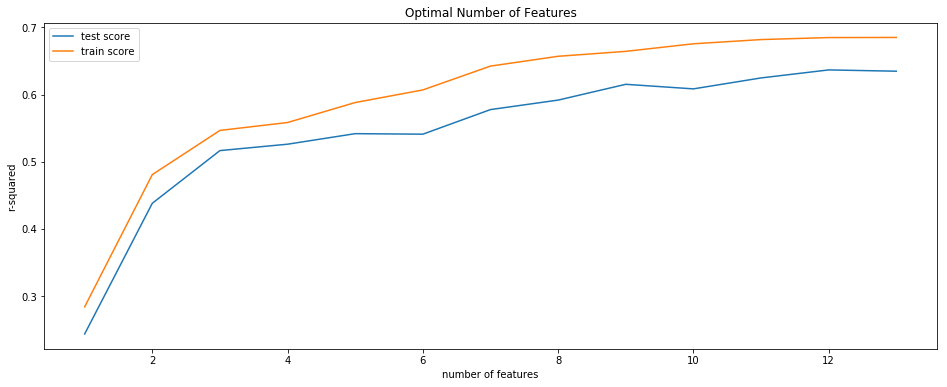

In [104]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [105]:
# final model
n_features_optimal = 12

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6729582743459919
